In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import pandas as pd

def get_figsize(wf=0.5, hf=(5.**0.5-1.0)/2.0, columnwidth=320.39525):
    """ adapted from https://stackoverflow.com/questions/29187618/matplotlib-and-latex-beamer-correct-size
    Parameters:
      - wf [float]:  width fraction in columnwidth units
      - hf [float]:  height fraction in columnwidth units.
                     Set by default to golden ratio.
      - columnwidth [float]: width of the column in latex. Get this from LaTeX 
                             using \showthe\columnwidth
    Returns:  [fig_width,fig_height]: that should be given to matplotlib
    """
    fig_width_pt = columnwidth*wf 
    inches_per_pt = 1.0/72.27               # Convert pt to inch
    fig_width = fig_width_pt*inches_per_pt  # width in inches
    fig_height = fig_width*hf      # height in inches
    return [fig_width, fig_height]

# Experiment 1: ASPP rates

In [2]:
columns = ["Model", "Abs.Rel.", "Sq.Rel.", "RMSE", "RMSE log", "δ<1.25", "δ<1.25^2", "δ<1.25^3"]
data = [["Baseline", 0.1048, 1.0353, 5.458, 0.191, 0.866, 0.949, 0.98], 
        ["1,1,1,1", 0.1021, 0.9561, 5.300, 0.185, 0.870, 0.956, 0.984],
        ["1,2,3,4", 0.1037, 1.0007, 5.446, 0.190, 0.869, 0.954, 0.983],
        ["1,3,5,7", 0.1055, 1.0374, 5.421, 0.191, 0.866, 0.951, 0.982]]

baseline_stds = dict(zip(["Abs.Rel.", "Sq.Rel.", "RMSE", "RMSE log", "δ<1.25", "δ<1.25^2", "δ<1.25^3"],[0.000896, 0.027740, 0.052229, 0.001508, 0.002517, 0.001765, 0.000778]))
df = pd.DataFrame(columns=columns, data=data)

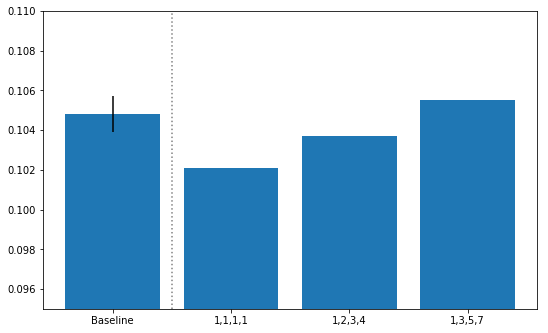

In [3]:
f, ax = plt.subplots(figsize=get_figsize(2.0))

bar = ax.bar(df["Model"], df["Abs.Rel."], yerr=[baseline_stds["Abs.Rel."], 0, 0, 0])
ax.set_ylim((0.095, 0.11))
ax.axvline(x=0.5, color='gray', linestyle=':')

/home/dominik/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


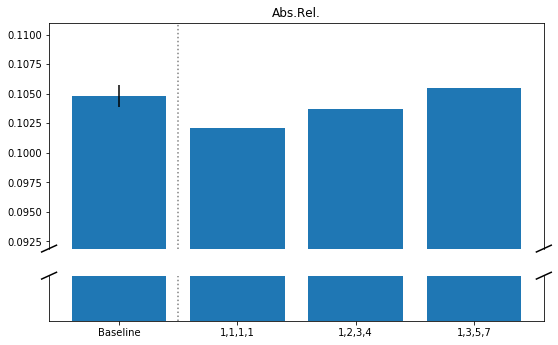

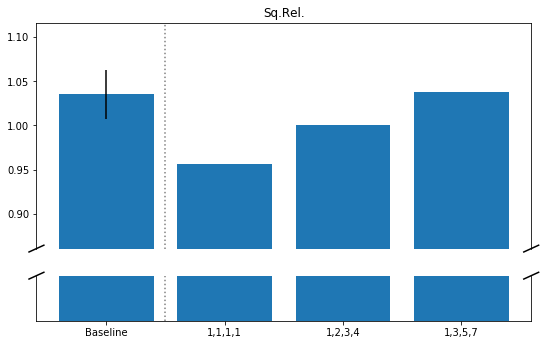

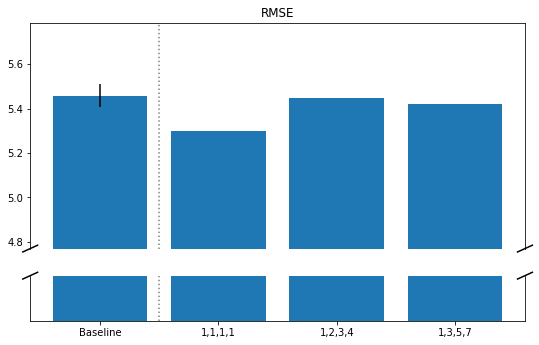

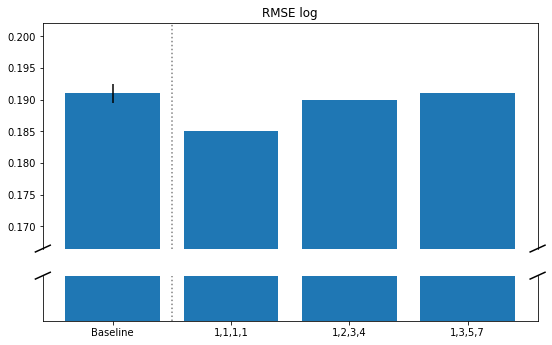

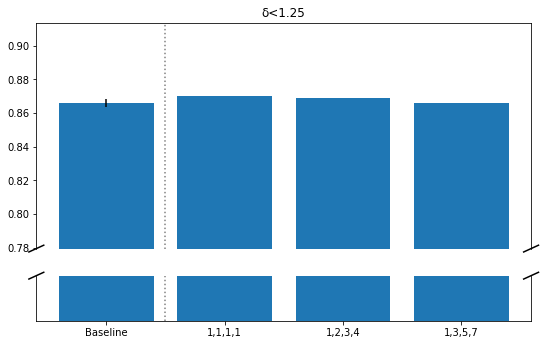

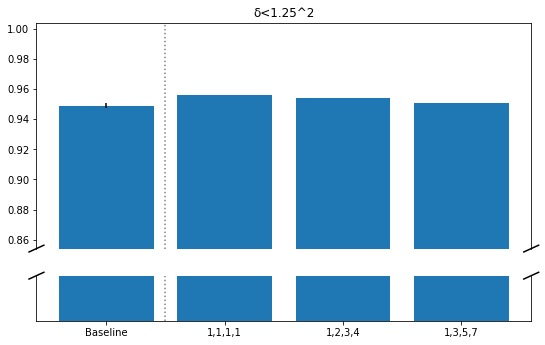

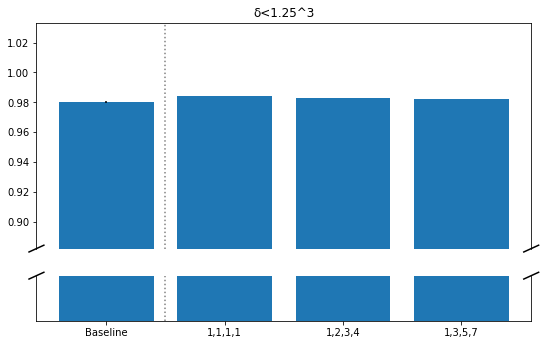

In [4]:
def broken_barplot(x, y, yerr, ratio=5, title="", figsize=None):
    """ adapted from https://matplotlib.org/examples/pylab_examples/broken_axis.html
    """
    f = plt.figure(figsize=figsize)

    gs = gridspec.GridSpec(2, 1 ,height_ratios=[ratio,1])

    ax = plt.subplot(gs[0])
    ax2 = plt.subplot(gs[1])

    ax.set_title(title)

    # plot the same data on both axes
    bar = ax.bar(x, y, yerr=yerr)
    ax.axvline(x=0.5, color='gray', linestyle=':')
    ax2.bar(x, y, yerr=yerr)
    ax2.axvline(x=0.5, color='gray', linestyle=':')

    ylim = ax.get_ylim()
    ylim = 0.9 * min([patch.get_height() for patch in bar.patches]), ylim[1]
    # zoom-in / limit the view to different portions of the data
    ax.set_ylim(ylim)  # most of the data
    ax2.set_ylim(0, 0.003)  # just the bottom to indicate break in y axis

    # hide the spines between ax and ax2
    ax.spines['bottom'].set_visible(False)
    ax2.spines['top'].set_visible(False)
    ax.xaxis.tick_top()
    ax.tick_params(labeltop='off', top='off')  # don't put tick labels at the top
    ax2.tick_params(left='off', labelleft='off')
    ax2.xaxis.tick_bottom()

    # This looks pretty good, and was fairly painless, but you can get that
    # cut-out diagonal lines look with just a bit more work. The important
    # thing to know here is that in axes coordinates, which are always
    # between 0-1, spine endpoints are at these locations (0,0), (0,1),
    # (1,0), and (1,1).  Thus, we just need to put the diagonals in the
    # appropriate corners of each of our axes, and so long as we use the
    # right transform and disable clipping.

    d = .015  # how big to make the diagonal lines in axes coordinates
    # arguments to pass to plot, just so we don't keep repeating them
    kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
    ax.plot((-d, +d), (-d, +d), **kwargs)        # top-left diagonal
    ax.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # top-right diagonal

    kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
    ax2.plot((-d, +d), (1 - ratio*d, 1 + ratio*d), **kwargs)  # bottom-left diagonal
    ax2.plot((1 - d, 1 + d), (1 - ratio*d, 1 + ratio*d), **kwargs)  # bottom-right diagonal

    
for error in ["Abs.Rel.", "Sq.Rel.", "RMSE", "RMSE log", "δ<1.25", "δ<1.25^2", "δ<1.25^3"]:
    broken_barplot(df["Model"], df[error], yerr=[baseline_stds[error], 0, 0, 0], title=error, figsize=get_figsize(2.0))

# Experiment 2: ASPP modules

In [6]:
columns2 = ["Model", "Abs.Rel.", "Sq.Rel.", "RMSE", "RMSE log", "δ<1.25", "δ<1.25^2", "δ<1.25^3", "#params"]

data2 = [["Baseline", 0.1048, 1.0353, 5.458, 0.191, 0.866, 0.949, 0.98, 58452008], 
        ["1", 0.1036, 1.0123, 5.403, 0.187, 0.867, 0.955, 0.984, 44120216],
        ["1,1", 0.1027, 1.026, 5.373, 0.188, 0.872, 0.955, 0.983, 48904856],
        ["1,1,1", 0.1020, 0.9639, 5.356, 0.188, 0.868, 0.956, 0.983, 53689496],
        ["1,1,1,1", 0.1021, 0.9561, 5.300, 0.185, 0.870, 0.956, 0.984, 58474136],
        ["1,1,1,1,1", 0.1014, 0.9703, 5.303, 0.186, 0.873, 0.955, 0.984, 63258776]]

df2 = pd.DataFrame(columns=columns2, data=data2)
df2

,Model,Abs.Rel.,Sq.Rel.,RMSE,RMSE log,δ<1.25,δ<1.25^2,δ<1.25^3,#params
0,Baseline,0.1048,1.0353,5.458,0.191,0.866,0.949,0.980,58452008
1,1,0.1036,1.0123,5.403,0.187,0.867,0.955,0.984,44120216
2,"1,1",0.1027,1.0260,5.373,0.188,0.872,0.955,0.983,48904856
3,"1,1,1",0.1020,0.9639,5.356,0.188,0.868,0.956,0.983,53689496
4,"1,1,1,1",0.1021,0.9561,5.300,0.185,0.870,0.956,0.984,58474136
5,"1,1,1,1,1",0.1014,0.9703,5.303,0.186,0.873,0.955,0.984,63258776


Text(0.5, 1.0, '#params')

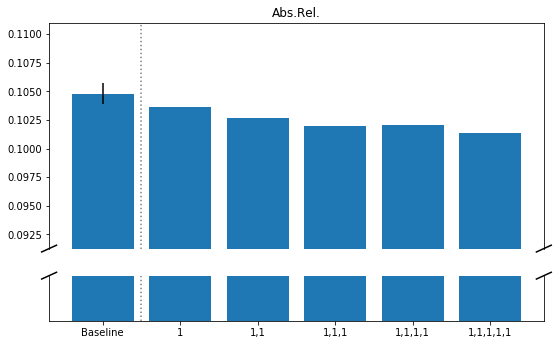

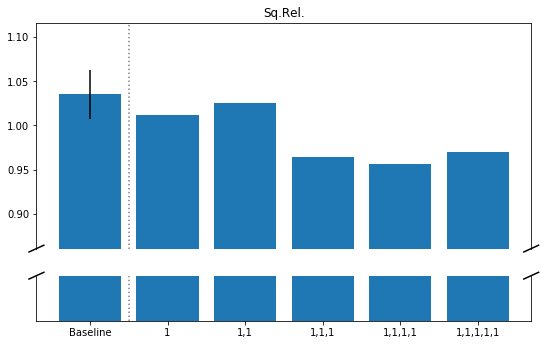

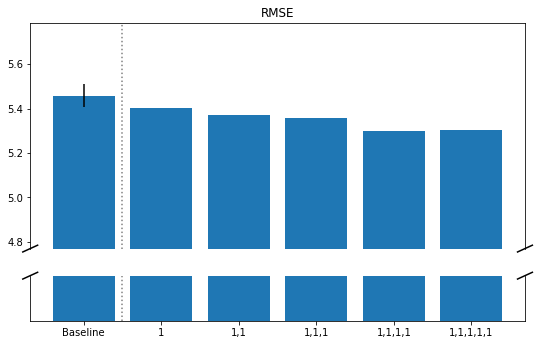

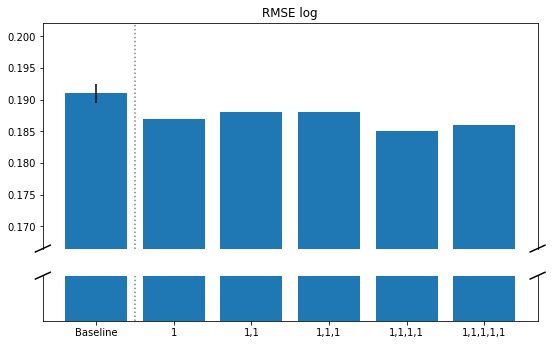

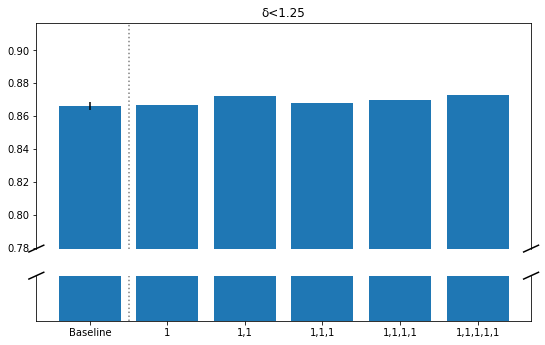

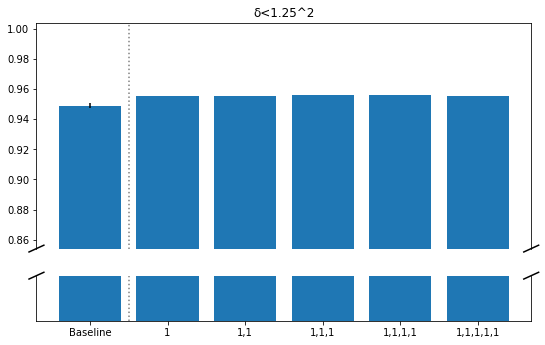

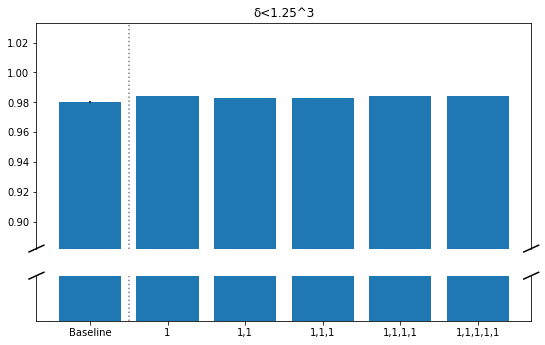

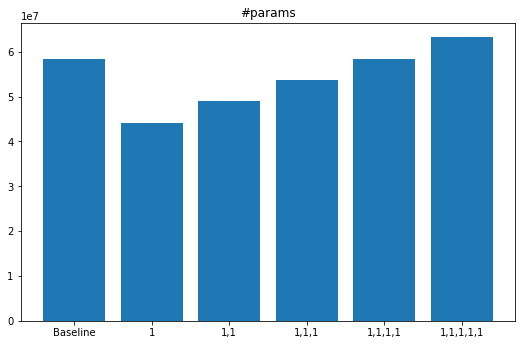

In [7]:
for error in ["Abs.Rel.", "Sq.Rel.", "RMSE", "RMSE log", "δ<1.25", "δ<1.25^2", "δ<1.25^3"]:
    broken_barplot(df2["Model"], df2[error], yerr=[baseline_stds[error], 0, 0, 0, 0, 0], title=error, figsize=get_figsize(2.0))
    
plt.figure(figsize=get_figsize(2.0))
plt.bar(df2["Model"], df2["#params"])
plt.title('#params')